# PROJECT-INVESTIGATE A DATASET(tmdb)




CONTENT
<ul>
<li><a href ="#intro">Introduction</a></li>
<li><a href ="#wrangling">Data Wrangling</a></li>
<li><a href ="#eda">Exploratory Data Analysis</a></li>
<li><a href ="#conclusions">Conclusions</a></li>
</ul>

# Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including,cast,director, user ratings and revenue.



In [2]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read in data
df_movies = pd.read_csv("C:/Users/ProBook/Desktop/UDACITY DATA ANALYST NANODEGREE/tmdb-movies.csv")

In [4]:
#display the first five lines of the data
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Some questions that will give insight into the data includes;

Which genre is the most popular?

Do shorter movies receive more rating?

Does popularity have an impact on revenue?

Top 5 movie directors by vote count?

Top 10 movies by popualrity

Budget influence on revevenue per year.

Which year had the highest revenue generation?

Does  number of movies produced yearly have a direct impact on revenue generated?



# Data Wrangling



Accessing the dataframe using some pandas method.


View the total number of rows and columns using the shape method.

In [5]:

df_movies.shape


(10866, 21)

View more detailed summary of the dataset to understand more about the columns and the datatype of the features.

In [6]:

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Use the dtypes method to futher access the exact datatype contained in each column.

In [7]:

df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

From the accessment,I noticed the release date type is an integer so it should be converted to date time.

In [8]:
#convert date column to datetime
df_movies["release_date"]= pd.to_datetime(df_movies["release_date"])

In [9]:
#check if it has been converted
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

View number of unique values in each column.

In [10]:

df_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Statistical analysis of data using the describe function.

In [11]:

df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#check for null values
df_movies.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

To carry out futhur analysis I'll be dropping the null values from the data set.

In [13]:
#remove null values from the data set
df_movies.dropna(inplace=True)

In [14]:
df_movies.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [15]:
#check for duplicates
df_movies.duplicated().sum()

0

There are no duplicates in the dataframe.

I'll also drop the columns that would not be very relevant in answering some of the questions posed.
Some of them include categorical data that wont be needed for futhur analysis.

In [16]:
#df.drop(['C', 'D'], axis=1)
df_movies.drop(columns = ['imdb_id','homepage','tagline','overview','keywords'],axis = 1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,668,1.778746,7000000,81974493,On Her Majesty's Secret Service,George Lazenby|Diana Rigg|Telly Savalas|Gabrie...,Peter R. Hunt,142,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2069-12-12,258,6.4,1969,4.160985e+07,4.872780e+08
10759,948,1.198849,300000,70000000,Halloween,Donald Pleasence|Jamie Lee Curtis|P.J. Soles|N...,John Carpenter,91,Horror|Thriller,Compass International Pictures|Falcon Internat...,1978-10-25,522,7.3,1978,1.002810e+06,2.339890e+08
10760,8469,1.157930,2700000,141000000,Animal House,John Belushi|Tim Matheson|John Vernon|Verna Bl...,John Landis,109,Comedy,Universal Pictures|Oregon Film Factory|Stage I...,1978-07-27,230,6.7,1978,9.025292e+06,4.713208e+08
10817,13963,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,117,Documentary|Music,FM Productions|Last Waltz Inc.,1978-05-01,33,8.0,1978,0.000000e+00,1.076189e+06


In [17]:
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


# EXPLORATORY DATA ANALYSIS

Histogtram for diferent columns.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

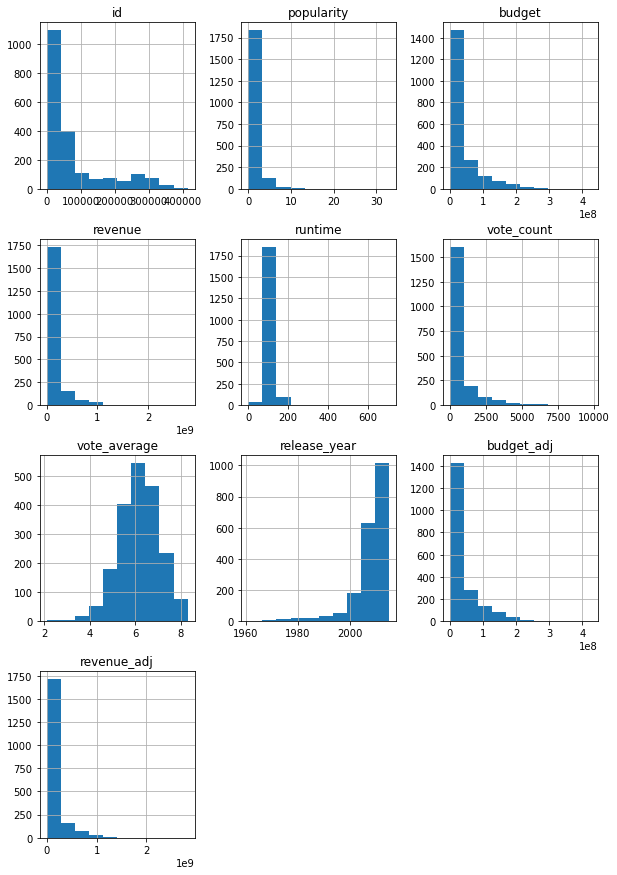

In [20]:
df_movies.hist(figsize=(10,15))

Which genre is the most popular?

The genre column contains different values that are seperated by | sperator.
The splitbyseprator function is used to split the values in that particular column so the data can be better 
represented to find out the most popular genre.


In [21]:
def splitbyseperator(column,seperator):
    return column.str.split(seperator,expand=True)

In [22]:
df_moviegenre = df_movies.copy()

In [23]:
df_moviegenre['genres']= df_moviegenre.genres.str.split('|')

In [24]:
df_genre_split = df_moviegenre.explode('genres')
df_genre_split.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


<AxesSubplot:title={'center':'Genre POPULARITY'}, xlabel='genres'>

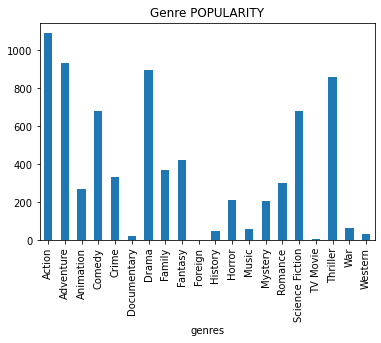

In [25]:
df_genre_group = df_genre_split.groupby(['genres']).popularity.sum()
plt.title("Genre POPULARITY")
df_genre_group.plot(kind="bar")



Top 5 directors by vote count

In [26]:
df_top_directors=df_movies.groupby("director")["vote_count"].sum().sort_values(ascending=False)

df_top_5= df_top_directors.head(5)

<AxesSubplot:ylabel='vote_count'>

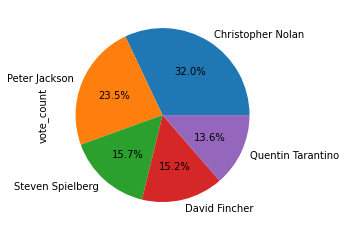

In [27]:
df_top_5.plot(kind = 'pie',autopct='%1.1f%%')

Top 10 most popular movies

In [28]:
top10_movie = df_movies.groupby("original_title")["popularity"].sum().sort_values(ascending=False).head(10)

In [29]:
top10_movie

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

In [30]:
df_movies["revenue"].mean()

115215273.41516064

Do shorter movies receive more rating?

In [31]:
# get the median of run time

df_movies.runtime.median()

102.0

In [32]:
rt= df_movies.shape[0]
# select samples with runtime less than median
less_runtime = df_movies.query ('runtime < 102.0')

# select samples with runtime greater than or equal to the median
more_runtime = df_movies.query ('runtime >= 102.0')

# ensure these queries included each sample exactly once
rt == less_runtime['vote_average'].count() + more_runtime['vote_average'].count() # should be True

True

In [33]:
# get mean quality rating for the less and more runtime
less_runtime.vote_average.mean(), more_runtime.vote_average.mean()

(5.9221311475409815, 6.425000000000001)

Observation

Movies with low runtime have a higher vote average than movies with less runtime.

Budget influence on revenue per yer

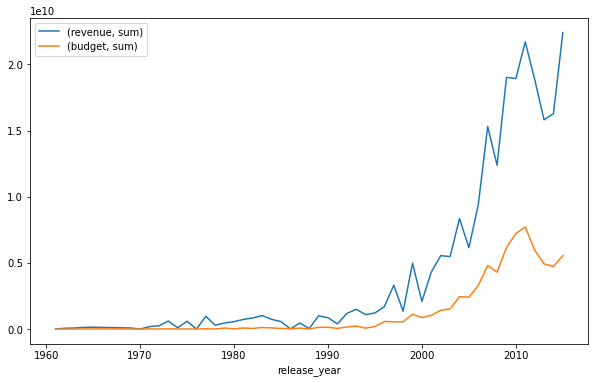

In [34]:
# creating a visualization to compare the revenue and the budget
df_movies.groupby('release_year')[['revenue','budget']].agg(['sum']).plot(figsize=(10,6));
plt.legend(loc='best');

OBSERVATION

From the graph the revenue  increased as the budget increased,however between 1960 - 1970, the budget remained stable and there were years with more revenue growth.In 2015, while the budget reduced the revenue generated was high.The sharp dip at the end cannot really be accounted for at this time.

Which year had the highest revenue generation?

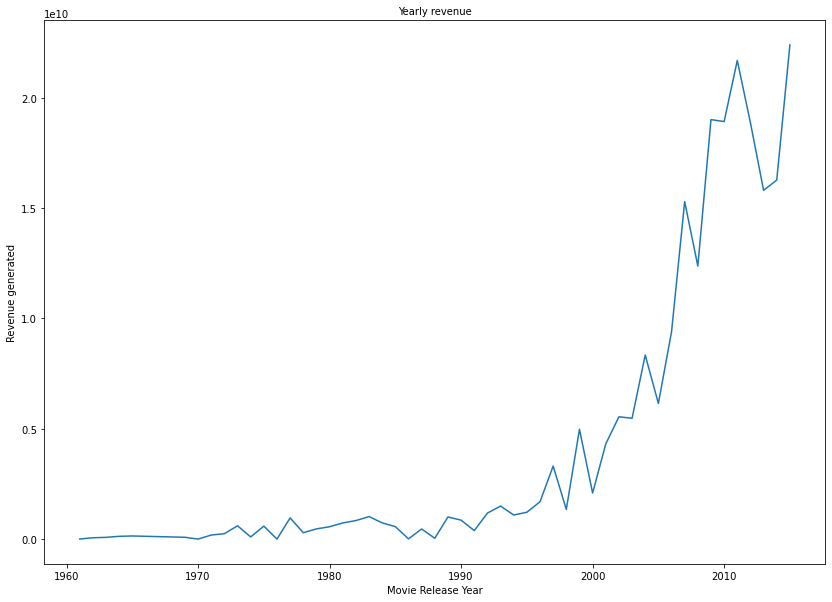

In [35]:

high_revenue =df_movies.groupby(['release_year'])['revenue'].sum()

plt.figure(figsize=(14,10))
plt.xlabel('Movie Release Year', fontsize=10)
plt.ylabel('Revenue generated', fontsize=10)
plt.title('Yearly revenue', fontsize=10)
plt.plot(high_revenue);

In [36]:
#getting the year with the highest revenue
high_revenue.idxmax()

2015

2015 had the highest revenue from the visualization.

Does  number of movies produced yearly have a direct impact on revenue generated?

In [37]:
movie_peryear = df_movies.groupby('release_year').agg(movie_count = ('original_title', 'count'))

movie_peryear

,movie_count
release_year,
1961,1
1962,1
1963,1
1964,2
1965,1
1967,1
1969,1
1970,1
1971,4


<AxesSubplot:xlabel='release_year'>

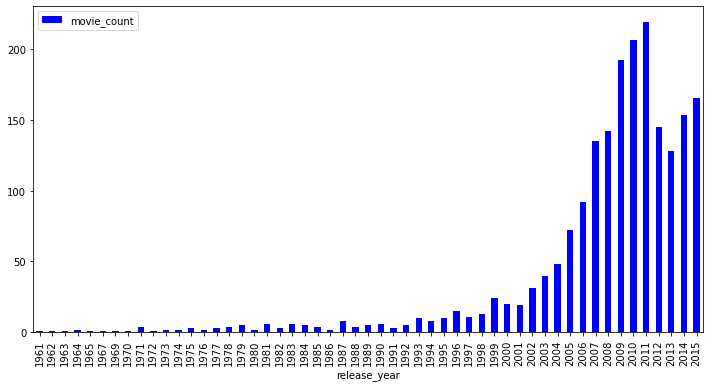

In [38]:
movie_peryear.plot.bar(color = 'blue', figsize=(12,6))

The number of movies produced increased a great deal between 1999 - 2015.
I'll  say that the revenue generated was impacted by the number of movies produced.
2015 is a peculiar case as it has higher revenue than 2011 which has  the highest number of movies released.

# Conclusion



Action is the most popular genre,followed by drama and then thriller.

Movies with low runtime have a higher vote average than movies with less runtime.

From the graph the revenue increased as the budget increased,however between 1960 - 1970, the budget remained stable and there were years with more revenue growth.In 2015, while the budget reduced the revenue generated was high.The sharp dip at the end cannot really be accounted for at this time.

2015 had the highest revenue from the visualization.




# Limitations


The number of missing and  null values that affected the analysis, we cannot conclude on our findings because the data used for this analysis doesn't account for the whole population.

